<h1><center> Inferential statistics on the I-SPY1 Clinical Trial</center></h1>

In [1]:
# import custom modules wrote by julio
import seaborn as sns
import pandas as pd
%matplotlib inline
#from capstone_01 import clean_data
from ispy1 import inferential_statistics

# reload modules without restartign the kernel (makes development easier)
# import importlib
#importlib.reload(inferential_statistics);

/Users/Julio/anaconda/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### 0. load clean data

In [2]:
df = pd.read_csv('./data/I-SPY_1_clean_data.csv')
df.head(2)

,SUBJECTID,age,White,ER+,PR+,HR+,Bilateral,Right_Breast,MRI_LD_Baseline,MRI_LD_1_3dAC,MRI_LD_Int_Reg,MRI_LD_PreSurg,Alive,Survival_length,RFS,RFS_code,PCR,RCB
0,1001,38.73,Yes,Yes,No,Yes,No,No,88.0,78.0,30.0,14.0,No,1264,751,1,No,2.0
1,1002,37.79,Yes,Yes,Yes,Yes,No,Yes,29.0,26.0,66.0,16.0,No,1155,1043,1,No,3.0


# 1. Inferential_statistics: Categorical vs Categorical (Chi-2 test)

### 1. 1 Effect of categorical predictors on Pathological complete response (`PCR`)

In [3]:
# example of contingency table
inferential_statistics.contingency_table('PCR', 'ER+',df)

ER+,Yes,No
PCR,,
Yes,17.0,28.0
No,81.0,42.0


In [4]:
# Perform chi-2 test on all categorical variables
predictors = ['White', 'ER+', 'PR+', 'HR+','Right_Breast']
outcome = 'PCR'
inferential_statistics.categorical_data(outcome, predictors, df)

,p-value,Relative_Risk,RR_lb,RR_ub
White,0.833629,0.8878,0.5076,1.5528
ER+,0.001988,0.4337,0.2582,0.7285
PR+,0.000198,0.3219,0.1707,0.6069
HR+,0.000307,0.3831,0.2286,0.6422
Right_Breast,0.851883,1.0965,0.6649,1.8080


<h3><center> 1.1.2 Conclusion: Only `ER+` , `PR+`, and `HR+` have an effect on `PCR`</center></h3>


### 1. 2 Effect of categorical predictors on Survival (`Alive`)

In [5]:
predictors = ['White', 'ER+', 'PR+', 'HR+','Right_Breast','PCR']
outcome = 'Alive'
inferential_statistics.categorical_data(outcome, predictors, df)

,p-value,Relative_Risk,RR_lb,RR_ub
White,0.439359,1.0935,0.9032,1.3239
ER+,0.001135,1.3095,1.1025,1.5554
PR+,0.162557,1.1266,0.9739,1.3031
HR+,0.038917,1.1950,1.0094,1.4148
Right_Breast,0.729139,0.9602,0.8287,1.1125
PCR,0.070860,1.1796,1.0333,1.3467


<h3><center> 1.2.2 Conclusion: Only `ER+` and `HR+` have an effect on `Alive`</center></h3>

## 2. Inferential_statistics: Continous vs Categorical (ANOVA)

### 2.1 Effect of Age on PCR 

---------------------------------------------
             sum_sq     df         F    PR(>F)
age        0.256505    1.0  1.302539  0.255394
Residual  32.689923  166.0       NaN       NaN
---------------------------------------------


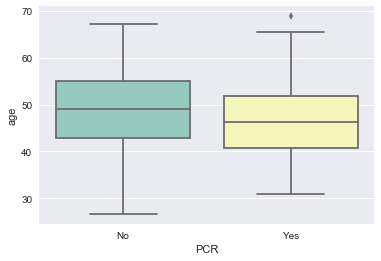

In [6]:
predictor= ['age']
outcome = 'PCR'
anova_table, OLS = inferential_statistics.linear_models(df, outcome, predictor);
sns.boxplot(x= outcome, y=predictor[0], data=df, palette="Set3");

### 2.2 Effect of Age on Survival 

---------------------------------------------
             sum_sq     df         F    PR(>F)
age        0.062227    1.0  0.399719  0.528104
Residual  25.842534  166.0       NaN       NaN
---------------------------------------------


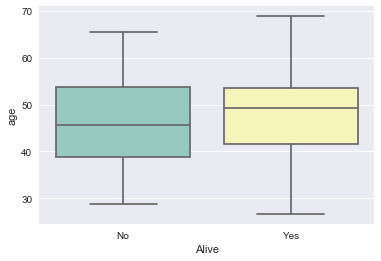

In [7]:
predictor= ['age']
outcome = 'Alive'
anova_table, OLS = inferential_statistics.linear_models(df, outcome, predictor);
sns.boxplot(x= outcome, y=predictor[0], data=df, palette="Set3");

### 2.3 Explore interactions between age, survival, and PCR

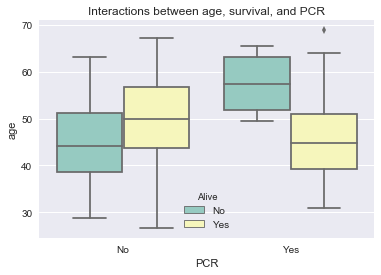

In [8]:
# create a boxplot to visualize this interaction
ax = sns.boxplot(x= 'PCR', y='age', hue ='Alive',data=df, palette="Set3");
ax.set_title('Interactions between age, survival, and PCR');

In [9]:
# create dataframe only for patients with PCR = Yes
df_by_PCR = df.loc[df.PCR=='No',:]
df_by_PCR.head()

# Anova age vs Alive
predictor= ['age']
outcome = 'Alive'
anova_table, OLS = inferential_statistics.linear_models(df_by_PCR, outcome, predictor);

---------------------------------------------
             sum_sq     df         F    PR(>F)
age        0.637369    1.0  3.674443  0.057611
Residual  20.988648  121.0       NaN       NaN
---------------------------------------------


In [10]:
# estimate the effect size
mri_features = ['age']
outcome = 'Alive'
# Effect Size
inferential_statistics.effect_size( df_by_PCR, mri_features, outcome)

,Effect Size
Predictor of Alive,
age,-0.409422


## Conclusion.

1. `age` has an important effect on `Alive` for patients with `PCR` = Yes
2. To quantitify this effect a logistic regression is needed

### 2.4 Effect of MRI measurements on PCR ANOVA

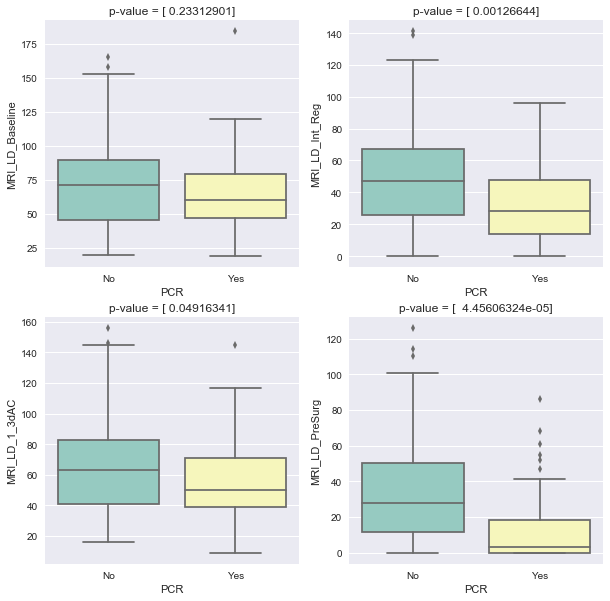

In [11]:
R = inferential_statistics.anova_MRI('PCR', df);

** Estimate the effect size **

In [12]:
mri_features = ['MRI_LD_Baseline', 'MRI_LD_1_3dAC', 'MRI_LD_Int_Reg', 'MRI_LD_PreSurg']
outcome = 'PCR'
# Effect Size
inferential_statistics.effect_size( df, mri_features, outcome)

,Effect Size
Predictor of PCR,
MRI_LD_Baseline,0.191798
MRI_LD_1_3dAC,0.304774
MRI_LD_Int_Reg,0.502345
MRI_LD_PreSurg,0.590352


### 2.5 Effect of MRI measurements on Survival ANOVA

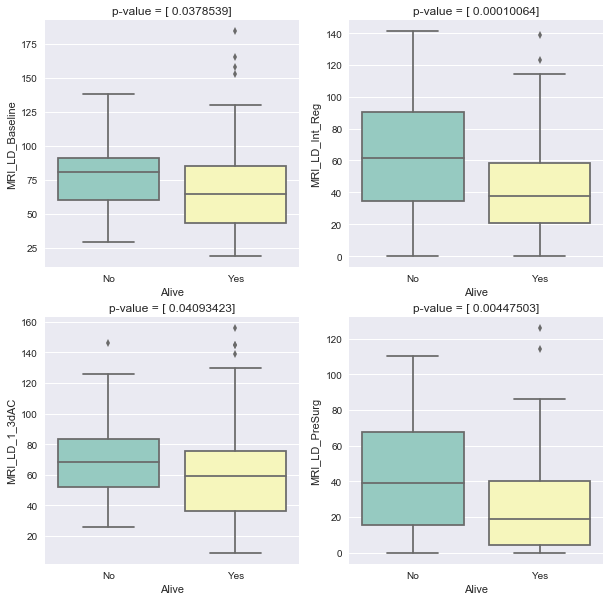

In [13]:
outcome = 'Alive'
R = inferential_statistics.anova_MRI(outcome, df);

In [14]:
mri_features = ['MRI_LD_Baseline', 'MRI_LD_1_3dAC', 'MRI_LD_Int_Reg', 'MRI_LD_PreSurg']
outcome = 'Alive'
# Effect Size
inferential_statistics.effect_size( df, mri_features, outcome)

,Effect Size
Predictor of Alive,
MRI_LD_Baseline,0.375046
MRI_LD_1_3dAC,0.357002
MRI_LD_Int_Reg,0.678682
MRI_LD_PreSurg,0.469548


### stratify analysis by PCR

In [15]:
# predictors and outcomes
predictors= ['MRI_LD_Baseline', 'MRI_LD_1_3dAC', 'MRI_LD_Int_Reg', 'MRI_LD_PreSurg']

# split data and run anova
PCR_outcomes = ['No','Yes']

for out in PCR_outcomes:
    df_by_PCR = df.loc[df.PCR == out,:]
    print('Outcome = Alive' + ' | ' + 'PCR = ' + out)
    # Anova
    anova_table, OLS = inferential_statistics.linear_models(df_by_PCR, 'Alive', predictors);
    # Effect Size
    print(inferential_statistics.effect_size( df_by_PCR, predictors, 'Alive'))
    print('\n' * 2)

Outcome = Alive | PCR = No
---------------------------------------------
                    sum_sq     df         F    PR(>F)
MRI_LD_Baseline   0.081585    1.0  0.484431  0.487791
MRI_LD_1_3dAC     0.019421    1.0  0.115317  0.734774
MRI_LD_Int_Reg    0.423490    1.0  2.514580  0.115474
MRI_LD_PreSurg    0.143688    1.0  0.853186  0.357537
Residual         19.872834  118.0       NaN       NaN
---------------------------------------------
                    Effect Size
Predictor of Alive             
MRI_LD_Baseline        0.314555
MRI_LD_1_3dAC          0.362579
MRI_LD_Int_Reg         0.582373
MRI_LD_PreSurg         0.484103



Outcome = Alive | PCR = Yes
---------------------------------------------
                   sum_sq    df         F    PR(>F)
MRI_LD_Baseline  0.128853   1.0  1.966383  0.168546
MRI_LD_1_3dAC    0.240330   1.0  3.667597  0.062650
MRI_LD_Int_Reg   0.543712   1.0  8.297407  0.006352
MRI_LD_PreSurg   0.404720   1.0  6.176300  0.017228
Residual         2.621118  4

### Conclusion 

1. The largest tumor dimension measured at baseline (`MRI_LD_Baseline`) is not a statistically different between patients who achieved complete pathological response (`PCR`)and those who did not. While all other MRI measurements are statistically different between `PCR = Yes`, and `PCR = No`
2. All MRI measurements of the tumor dimension are different between patients who are Alive at the end of the trial and those who did not. These results do not indicate anything about the size of these effects. An statistically significant effect is not always clinically significant
3. The estimated effect sizes are very small, and most likley not clinically significant


In [16]:
## 3. Inferential_statistics: Continous vs Categorical (ANOVA)